# Part 1: Crop Recommendation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

Load Dataset

In [ ]:
crop_data = pd.read_csv(r'/content/drive/MyDrive/Crop_recommendation.csv')
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Train - Test data Split

In [ ]:
X = crop_data.drop(columns=['label'])
y = crop_data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.33)

Checking accuracy with Different Models

RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: ',(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set:', (RF.score(X_test, y_test)))

Accuracy of RF classifier on training set:  1.0
Accuracy of RF classifier on test set: 0.9958677685950413


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       1.00      0.97      0.99        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

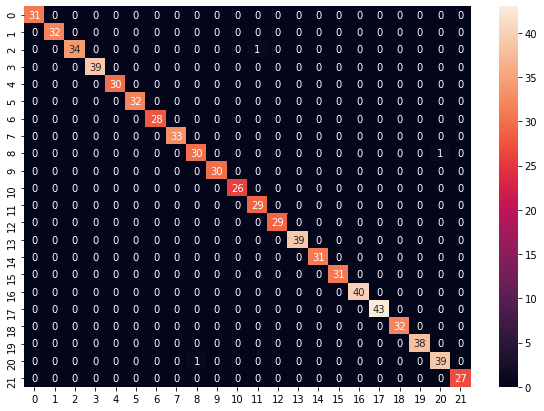

In [ ]:
predicted = RF.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

Gradient Boosting

In [ ]:
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(X_train, y_train)
print('Accuracy of GB classifier on training set: ',(GB.score(X_train, y_train)))
print('Accuracy of GB classifier on test set:', (GB.score(X_test, y_test)))

Accuracy of GB classifier on training set:  1.0
Accuracy of GB classifier on test set: 0.990358126721763


              precision    recall  f1-score   support

       apple       0.97      1.00      0.98        31
      banana       1.00      1.00      1.00        32
   blackgram       0.94      0.97      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       1.00      0.94      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.97      0.97      0.97        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      0.97      0.97        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

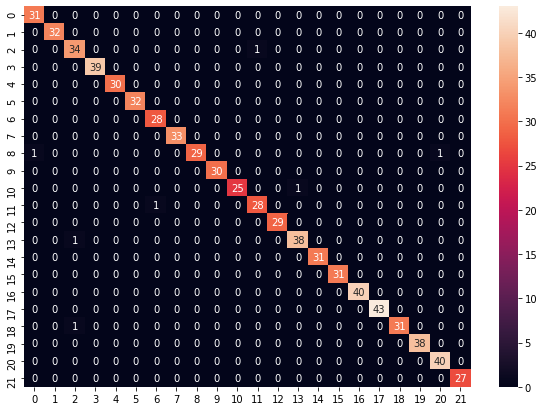

In [ ]:
predicted = GB.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

XGBoost

In [ ]:
XG = xgb.XGBClassifier()
XG.fit(X_train,y_train)
predicted1 = XG.predict(X_train)
predicted2 = XG.predict(X_test)
acc1 = metrics.accuracy_score(y_train, predicted1)
acc2 = metrics.accuracy_score(y_test, predicted2)
print('Accuracy of XG classifier on training set: ',acc1)
print('Accuracy of XG classifier on test set:', acc2)

Accuracy of XG classifier on training set:  1.0
Accuracy of XG classifier on test set: 0.9889807162534435


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.94      0.97      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.97      0.97      0.97        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      0.97      0.97        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

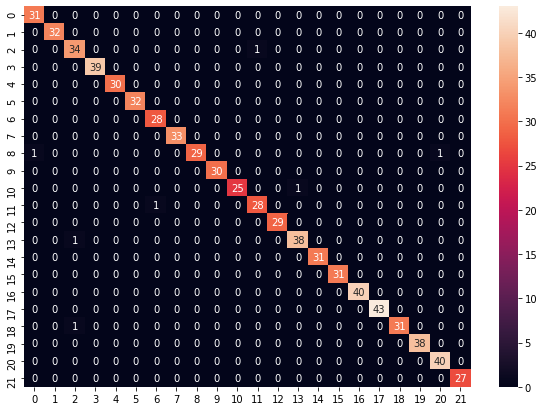

In [ ]:
print(classification_report(y_test,predicted2))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot=True)

MLP

In [ ]:
sc=StandardScaler() 
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
MLP = MLPClassifier(hidden_layer_sizes = [150, 100, 50], alpha = 1.0,
                    random_state = 0, solver='lbfgs', max_iter=5000).fit(X_train_scaled, y_train)
print('Accuracy of MLP on training set: ',(MLP.score(X_train_scaled, y_train)))
print('Accuracy of MLP on test set:', (MLP.score(X_test_scaled, y_test)))

Accuracy of MLP on training set:  1.0
Accuracy of MLP on test set: 0.9862258953168044


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       1.00      0.94      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.91      0.94      0.92        31
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.90      1.00      0.95        26
       maize       1.00      0.97      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.97      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

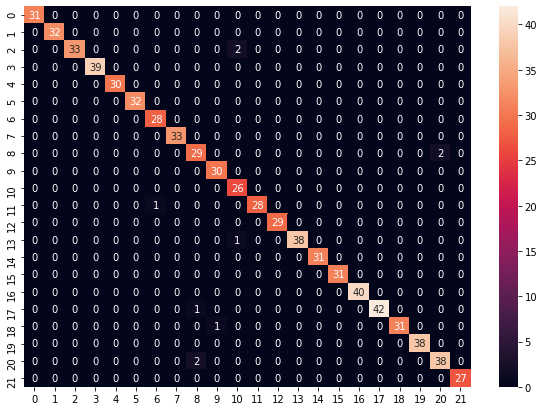

In [ ]:
predicted = MLP.predict(X_test_scaled)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

Save Models

In [ ]:
import joblib
filename = 'RandomeForestModel.sav'
joblib.dump(RF, filename)
filename = 'GradientBoostModel.sav'
joblib.dump(GB, filename)
filename = 'XGBoostModel.sav'
joblib.dump(XG, filename)
filename = 'MLPModel.sav'
joblib.dump(XG, filename)

['XGBoostModel.sav']

Load Saved Models and Checking Accuracy

In [ ]:
filename = 'GradientBoostModel.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.990358126721763


In [ ]:
filename = 'RandomeForestModel.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9958677685950413


In [ ]:
filename = 'XGBoostModel.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9889807162534435


In [ ]:
filename = 'MLPModel.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9889807162534435


In [ ]:
import joblib
filename = 'RandomeForestModel.sav'
joblib.dump(RF, filename)

['RandomeForestModel.sav']

In [ ]:
loaded_model=joblib.load(filename)
predicted = loaded_model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       1.00      0.97      0.99        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

Loading Model

In [ ]:
import joblib
loaded_model=joblib.load('RandomeForestModel.sav')

Front End Code Snippet

In [ ]:
# N	P	K	temperature	humidity	ph	rainfall	label
n = float(input("Enter the Nitrogen level in crop: "))
p = float(input("Enter the Phosphorus level in crop: "))
k = float(input("Enter the Pottasium level in crop: "))
temperature = float(input("Enter the avg temperature at your location: "))
humidity = float(input("Enter the Humidity level at your location: "))
ph = float(input("Enter the ph level of soil: "))
rainfall = float(input("Enter the avg rainfall at your location: "))
test=[[n,p,k,temperature,humidity,ph,rainfall]]
result = loaded_model.predict(test)
print("The best crop suited for your soil and location is: ", result[0])

Enter the Nitrogen level in crop: 90
Enter the Phosphorus level in crop: 42
Enter the Pottasium level in crop: 43
Enter the avg temperature at your location: 20.87
Enter the Humidity level at your location: 82
Enter the ph level of soil: 6.5
Enter the avg rainfall at your location: 201
The best crop suited for your soil and location is:  ['rice']
